In [4]:
import numpy as np
from scipy.io import loadmat
import random
import math

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.linear_model import LogisticRegression



from sklearn.preprocessing import scale
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn import cross_validation
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_circles, load_boston, load_iris, load_digits

import warnings
warnings.simplefilter(action = "ignore", category = FutureWarning) 

%matplotlib inline

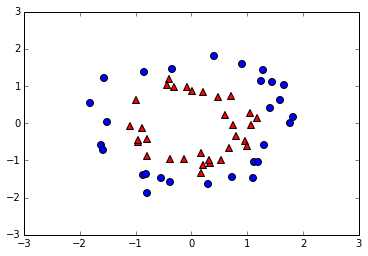

In [36]:
h = .02  # step size in the mesh


ds = make_circles(noise=0.1, factor=0.6, random_state=1)

# preprocess dataset, split into training and test part
X, y = ds
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4)

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# just plot the dataset first
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
# Plot the training points
plt.scatter(X_train[y_train==1, 0], X_train[y_train==1, 1], c='r',marker='^',s=48)
plt.scatter(X_train[y_train==0, 0], X_train[y_train==0, 1], c='b',marker='o',s=48)


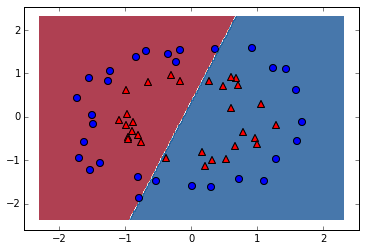

In [37]:
h = .02  # step size in the mesh


ds = make_circles(noise=0.1, factor=0.6, random_state=1)

# preprocess dataset, split into training and test part
X, y = ds
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4)

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# just plot the dataset first
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
# Plot the training points
plt.scatter(X_train[y_train==1, 0], X_train[y_train==1, 1], c='r',marker='^',s=48)
plt.scatter(X_train[y_train==0, 0], X_train[y_train==0, 1], c='b',marker='o',s=48)


clf = LogisticRegression(C=1e5)
clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=cm, alpha=.8)

# Plot also the training points
plt.scatter(X_train[y_train==1, 0], X_train[y_train==1, 1], c='r',marker='^',s=48)
plt.scatter(X_train[y_train==0, 0], X_train[y_train==0, 1], c='b',marker='o',s=48)    

plt.show()

In [38]:
# non-linear (polynomial) expansion
p = 2
mX_train = np.zeros((X_train.shape[0],p))
for i in range(p):
    mX_train[:,i] = np.sum(X_train**(i+1),axis=1)
aa = np.c_[xx.ravel(), yy.ravel()]
maa = np.zeros((aa.shape[0],p))

for i in range(p):
    maa[:,i] = np.sum(aa**(i+1),axis=1)

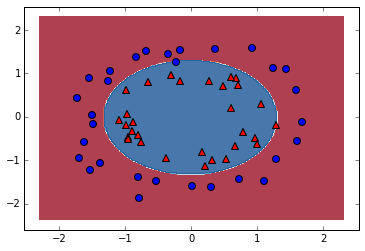

In [39]:
clf = LogisticRegression(C=1e5)
clf.fit(mX_train, y_train)
mZ = clf.predict(maa)
mZ = mZ.reshape(xx.shape)
plt.contourf(xx, yy, mZ, cmap=cm, alpha=.8)

# Plot also the training points
plt.scatter(X_train[y_train==1, 0], X_train[y_train==1, 1], c='r',marker='^',s=48)
plt.scatter(X_train[y_train==0, 0], X_train[y_train==0, 1], c='b',marker='o',s=48)    

plt.show()